In [ ]:
import numpy as np
import struct
from matplotlib import pyplot as plt
from scipy import signal

In [ ]:
#file = open('rags04ah.RCP-514-USB.arc2.bin', 'rb')
#file = open('secspec_slice_512x201.bin', 'rb')
file = open('rags29j.771-USB.combined.512x516.1of1.frdelay.ifft.tr.fft.tr_amp.dat', 'rb')
#file = open('raks02aa.514.lcp-rcp.averaged.secspec.1133x395.bin', 'rb')
bin = bytearray(file.read())
binlist = list(struct.unpack('f'*int(len(bin)/4), bin))

x_size = 512
y_size = 516
data = np.array(binlist, dtype=np.float32).reshape(y_size, x_size)
data = np.log10(data)
#data += abs(data.min())
#print(data.min())

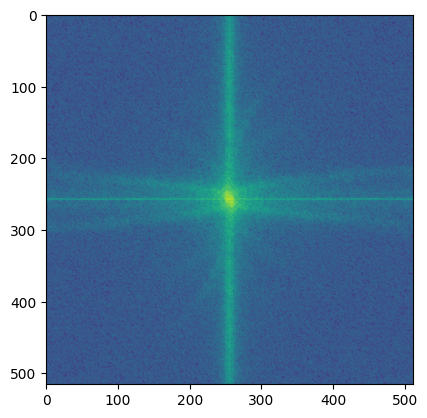

In [ ]:
plt.imshow(data)
plt.show()

In [ ]:
#filter1 = np.array([[0.0625, 0.125, 0.0625], [0.125, 0.25, 0.125], [0.0625, 0.125, 0.0625]])
#data = signal.convolve2d(data, filter1, mode='same')
#data[95:110, :] = data.min()
data[int(y_size/2)-5:int(y_size/2)+5, :] = data.min()
data[:, int(x_size/2)-5:int(x_size/2)+5] = data.min()
data = data[:, int(x_size/2):]
data += abs(data.min())
data.min()
#filter2 = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
#upd = signal.convolve2d(data, filter2, mode='same')

0.0

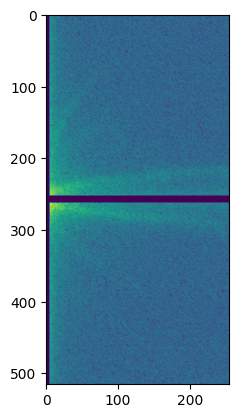

In [ ]:
plt.imshow(data)
plt.show()

In [ ]:
x_size, y_size = data.shape
print(data.shape)
def parabola(x_size, k):
  x = np.arange(x_size)
  y = [w if (w := k*(x-int(x_size/2))**2) < y_size else -1 for x in x]
  l = np.array([[u, v] for u, v in zip(x, y)]).astype(int)
  l = np.delete(l, np.where(l[:, 1] == -1), axis = 0)
  return l

def indexed(data, l):
  data_indexed = np.array([data[i, j] for i, j in l])
  return data_indexed

tval = np.linspace(0, 0.5, num=10000)
scores = np.vectorize(lambda t: indexed(data, parabola(x_size, t)).sum()/len(indexed(data, parabola(x_size, t))))(tval)
tmax = tval[scores.argmax()]
print(tmax)
#print(indexed(data, parabola(x_size, tmax)))

(516, 256)
0.15436543654365437
[3.490178  3.2093916 3.2776318 3.510663  3.6331062 3.1318493 3.9298992
 3.137576  3.550334  3.6883984 3.0836773 3.5940332 4.0143595 3.7542944
 3.4973488 3.2414656 4.050131  3.9717865 2.374217  3.7098837 4.4733
 4.559901  4.769735  5.119323  5.1481423 4.6757793 5.149221  5.0472918
 5.733186  5.5514703 5.761525  6.0078497 6.446235  6.4352756 6.862859
 0.        0.        0.        0.        0.        0.        0.
 0.        0.        0.        0.        7.714085  7.031773  6.129828
 6.753597  5.53738   5.9397783 5.916516  5.0110846 5.2704654 4.814148
 4.7755084 4.3375235 4.908535  4.389455  4.6316614 4.495288  3.9685822
 4.0016003 4.646984  3.9964066 4.2806015 4.1777744 3.3209467 3.8525476
 3.2813663 2.6134605 3.4261036 3.6222153 3.4588451 3.6506376 3.4700918
 2.8770437 3.1866484 3.767209  3.0680141]


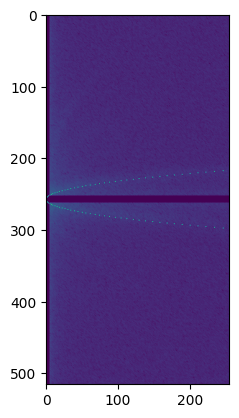

In [ ]:
points = parabola(x_size, tmax)
x, y = points[:, 0], points[:, 1]
new = data
new[x, y] = 3*data.max()
plt.imshow(data)
plt.show()

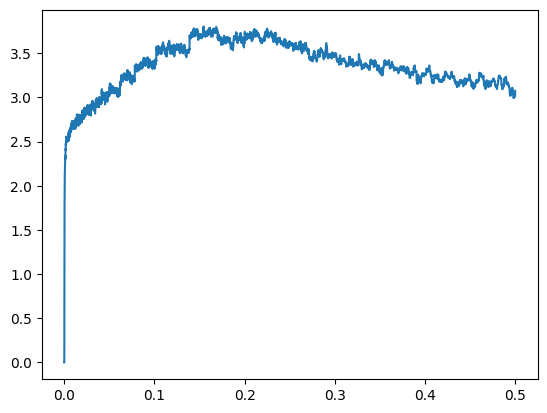

In [ ]:
plt.plot(tval, scores)

Тестовая область

In [ ]:
x_size = 21
y_size = 21
data = np.ones([y_size, x_size], dtype = int)
data

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
x = np.arange(x_size+1)
k = 1
y = [w if (w := k*(x-int(x_size/2))**2) <= y_size else -1 for x in x]
l = np.array([[u, v] for u, v in zip(y, x)])
l = np.delete(l, np.where(l[:, 0] == -1), axis = 0)
l

array([[16,  6],
       [ 9,  7],
       [ 4,  8],
       [ 1,  9],
       [ 0, 10],
       [ 1, 11],
       [ 4, 12],
       [ 9, 13],
       [16, 14]])

In [ ]:
data_indexed = np.array([data[i, j] for i, j in l])
data_indexed.sum()

9